In [2]:
from reprophylo import *

In [2]:
!head ../fetch_clean_align_tree/UK_Amphibian_Species_List.txt

Alytes obstetricans
Discoglossus pictus
Bombina bombina
Bombina variegata
Bufo bufo
Epidalea calamita
Hyla arborea
Xenopus laevis
Lithobates catesbeianus
Pelophylax esculentus


In [3]:
!fetch_from_db.py -t ../fetch_clean_align_tree/UK_Amphibian_Species_List.txt -m 12S -o UK_amphib_12S_Genbank_raw -@ L.Harper@2015.hull.ac.uk


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)

fetching accessions ..

#	Alytes obstetricans	21
#	Bombina bombina	10
#	Bombina variegata	21
#	Bufo bufo	5
#	Discoglossus pictus	25
#	Epidalea calamita	4
#	Hydromantes genei	22
#	Hyla arborea	11
#	Lissotriton helveticus	1
#	Lissotriton vulgaris	3
#	Lithobates catesbeianus	15
#	Mesotriton alpestris	3
#	Pelophylax esculentus	3
#	Pelophylax lessonae	10
#	Pelophylax ridibundus	17
#	Rana dalmatina	2
#	Rana temporaria	39
#	Salamandra salamandra	45
#	Triturus carnifex	3
#	Triturus cristatus	4
#	Xenopus laevis	20

total number of accessions fetched: 284


downloading 284 records .. processing 1000 accessions per batch

[Wed

Read reference sequences into ReproPhylo and filter to keep only proper 12S records.

In [4]:
list_loci_in_genbank('UK_amphib_12S_Genbank_raw.gb', # The input genbank file
                     'loci.csv',                     # The loci file
                     'loci_counts.txt')

Write counts of loci to a text file.

In [5]:
!cat loci_counts.txt

Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10217.1
Could not find either gene or product in M10188.1
Could not find either gene or product in M10188.1

There are 57 gene names (or gene product names) detected
----------------------------------
Gene and count sorted by gene name
----------------------------------
1 instances of CDS,atp6
28 instances of CDS,ATP6
28 instances of CDS,ATP8
1 instances of CDS,atp8
1 instances of CDS,ATPase subunit 6
1 instances of CDS,cob
6 instances of CDS,COI
6 instances of CDS,COII
6 instances of CDS,COIII
1 instances of CDS,cox1
22 instances of CDS,COX1
1 instances of CDS,cox2
22 instances of CDS,COX2
1 instances of CDS,cox3
22 instances of CDS,COX3
1 instances of CDS,cytb
28 instances of CDS,CYTB
5 instances of CDS,cytochrome b
1 instances of CDS,cytochrome 

Write loci and associated counts to a csv file.

In [6]:
!cat loci.csv

dna,rRNA,12S_ribosormal_RNA,12S ribosormal RNA
dna,CDS,ATPase_subunit_6,ATPase subunit 6
dna,CDS,MT-ATP6,atp6,ATP6
dna,CDS,MT-ATP8,ATP8,atp8
dna,CDS,MT-CO1,COI,cox1,COX1,cytochrome c oxidase subunit I
dna,CDS,MT-CO2,COII,cox2,COX2,cytochrome c oxidase subunit II
dna,CDS,MT-CO3,COIII,cox3,COX3,cytochrome c oxidase subunit III
dna,CDS,MT-CYB,cytb,CYTB,cytochrome b
dna,CDS,MT-ND1,nad1,NADH1,ND1
dna,CDS,MT-ND2,nad2,NADH2,ND2
dna,CDS,MT-ND3,nad3,NADH3,ND3
dna,CDS,MT-ND4,nad4,NADH dehydrogenase subunit 4,NADH4,ND4
dna,CDS,MT-ND4L,ND4L
dna,CDS,MT-ND5,nad5,NADH5,ND5
dna,CDS,MT-ND6,nad6,NADH6,ND6
dna,CDS,NADH4L,NADH4L
dna,CDS,NADH_dehydrogenase_1,NADH dehydrogenase 1
dna,CDS,NDI,NDI
dna,CDS,ORF_3,ORF 3
dna,CDS,cob,cob
dna,CDS,eral1.L,eral1.L
dna,rRNA,l-rRNA,l-rRNA
dna,CDS,mst1.L,mst1.L
dna,CDS,mst1.S,mst1.S
dna,CDS,nad4L,nad4L
dna,rRNA,rrnL,16S ribosomal RNA,16S rRNA
dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA
dna,rRNA,s-rRNA,s-rRNA
dna,CDS,tfb1m.L,tfb1m.L


Extract all synonyms for '12S' and write to text file.

In [7]:
%%file target_locus.csv
dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA,1
dna,rRNA,12S_ribosormal_RNA,12S ribosormal RNA,1
dna,rRNA,s-rRNA,s-rRNA,1

Writing target_locus.csv


In [8]:
!cat target_locus.csv

dna,rRNA,rrnS,12S ribosomal RNA,12S rRNA,1
dna,rRNA,12S_ribosormal_RNA,12S ribosormal RNA,1
dna,rRNA,s-rRNA,s-rRNA,1

Now, repeat process and create outgroups that can be used for tree construction as reference points for all amphibian sequences. *Chelydra serpentina*, *Cottus gobio* and *Gallus gallus* are ideal outgroups and have been used in a well-referenced phylogenetic study of amphibians (Frost *et al.* 2006). Other studies have used *Homo* but this would cause major problems downstream with laboratory contamination. 

In [9]:
%%file outgroup.txt
Chelydra serpentina
Cottus gobio
Gallus gallus

Writing outgroup.txt


In [10]:
!fetch_from_db.py -t ../fetch_clean_align_tree/outgroup.txt -m 12S -o outgroups -@ L.Harper@2015.hull.ac.uk


metaBEAT may be querying NCBI's Entrez databases to fetch/verify taxonomic ids. Entrez User requirements state that you need to identify yourself by providing an email address so that NCBI can contact you in case there is a problem.

You have specified: 'L.Harper@2015.hull.ac.uk'


QUERYING GENBANK

check for synonyms for "12S" (this is relevant only for Genbank searches)

fetching accessions ..

#	Chelydra serpentina	8
#	Cottus gobio	1
#	Gallus gallus	269

total number of accessions fetched: 278


downloading 278 records .. processing 1000 accessions per batch

[Wed Oct 26 2016 10:41:28]	batch: 0000001	278 unique records downloaded	-> outgroups.0000001.gb	(total: 278 (100.00 %); remaining: 0 -> DONE!)

Concatenate all files	-> outgroups.gb



In [11]:
list_loci_in_genbank('outgroups.gb', 'outgroup_list_of_loci.csv')

Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1
Could not find either gene or product in X52392.1

There are 43 gene names (or gene product names) detected
----------------------------------
Gene and count sorted by gene name
----------------------------------
93 instances of CDS,ATP6
93 instances of CDS,ATP8
8 instances of CDS,ATPase 6
1 instances of CDS,ATPase 8
1 instances of CDS,ATPase subunit 6
1 instances of CDS,ATPase subunit 8
7 instances of CDS,ATPase8
9 instances of CDS,COI
9 instances of CDS,COII
9 instances of CDS,COIII
92 instances of CDS,COX1
92 instances of CDS,COX2
92 instanc

In [12]:
!cat outgroup_list_of_loci.csv

dna,CDS,ATPase_6,ATPase 6
dna,CDS,ATPase_8,ATPase 8
dna,CDS,ATPase_subunit_6,ATPase subunit 6
dna,CDS,ATPase_subunit_8,ATPase subunit 8
dna,CDS,ERAL1,ERAL1
dna,CDS,MT-ATP6,ATP6
dna,CDS,MT-ATP8,ATP8,ATPase8
dna,CDS,MT-CO1,COI,COX1
dna,CDS,MT-CO2,COII,COX2
dna,CDS,MT-CO3,COIII,COX3
dna,CDS,MT-CYB,cytb,Cytb,CYTB,cytochrome b
dna,CDS,MT-ND1,NADH dehydrogenase subunit 1,ND1
dna,CDS,MT-ND2,NADH dehydrogenase subunit 2,ND2
dna,CDS,MT-ND3,NADH dehydrogenase subunit 3,ND3
dna,CDS,MT-ND4,NADH dehydrogenase subunit 4,NADH dehydrogenase subunit IV,ND4
dna,CDS,MT-ND4L,NADH dehydrogenase subunit 4L,ND4L
dna,CDS,MT-ND5,NADH dehydrogenase subunit 5,ND5
dna,CDS,MT-ND6,NADH dehydrogenase subunit 6,ND6
dna,CDS,cytochrome_oxidase_subunit_1,cytochrome oxidase subunit 1
dna,CDS,cytochrome_oxidase_subunit_2,cytochrome oxidase subunit 2
dna,CDS,cytochrome_oxidase_subunit_3,cytochrome oxidase subunit 3
dna,CDS,cytochrome_oxidase_subunit_I,cytochrome oxidase subunit I
dna,CDS,cytochrome_oxidase_subunit_III,cyto

# Reprophylo project

Start ReproPhylo project.

In [13]:
pj=Project('target_locus.csv', pickle='amphib_raw.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [14]:
#pj=unpickle_pj('amphib_raw.pkl')

Read sequences into ReproPhylo.

In [15]:
pj.read_embl_genbank(['UK_amphib_12S_Genbank_raw.gb', 'outgroups.gb'])

/home/reprophylo/reprophylo.py:1015: UserWarning: Version control off
  warnings.warn('Version control off')


In [16]:
pj.extract_by_locus()

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


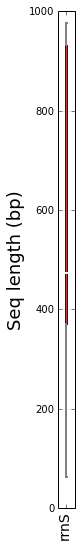

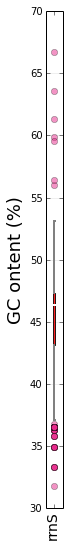

In [17]:
%matplotlib inline
pj.report_seq_stats()

In [18]:
pj.species_vs_loci('species_vs_locus_raw.csv')

In [19]:
!cat species_vs_locus_raw.csv

In [20]:
species=[]
for r in pj.records:
    source = [f for f in r.features if f.type == 'source'][0]
    species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 512
Number of species (see below for full list): 24
['Alytes obstetricans', 'Pelophylax ridibundus', 'Discoglossus pictus', 'Lissotriton vulgaris', 'Bombina bombina', 'Lissotriton helveticus', 'Ichthyosaura alpestris', 'Rana dalmatina', 'Epidalea calamita', 'Xenopus laevis', 'Salamandra salamandra', 'Triturus carnifex', 'Rana temporaria', 'Bombina variegata', 'Cottus gobio', 'Hyla arborea', 'Gallus gallus', 'Pelophylax esculentus', 'Triturus cristatus', 'Rana catesbeiana', 'Bufo bufo', 'Pelophylax lessonae', 'Chelydra serpentina', 'Hydromantes genei']


In [21]:
def crop_to_CDS(record):
    """The function crops a Genbank record to only retain the sequence of the first CDS"""
    
    from Bio import SeqFeature
    
    strands=[]
    r = record
    print "\nprocessing record: '%s' " %r.id,
    if r.features:
        for feature in r.features:
            if feature.type == 'CDS':
                strands.append(feature.location.strand)
                gene_name = feature.qualifiers['gene'][0]
                r.seq = r.seq[feature.location.start:feature.location.end]
                feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                              SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                             1)
                break    
            elif feature.type == 'rRNA':
                strands.append(feature.location.strand)
                qualifiers = feature.qualifiers
                               
                if 'product' in qualifiers:
                    gene_name = feature.qualifiers['product'][0]
                    r.seq = r.seq[feature.location.start:feature.location.end]
                    feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                                  SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                                  1)
                    break
                elif 'gene' in qualifiers:
                    gene_name = feature.qualifiers['gene'][0]
                    r.seq = r.seq[feature.location.start:feature.location.end]
                    feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                                  SeqFeature.ExactPosition(feature.location.end - feature.location.start), 
                                                                  1)

                
        for feature in r.features:
            if feature.type == 'source':
                strands.append(feature.location.strand)
                feature.qualifiers['note'] = ['modified from original record: cropped to only CDS/rRNA '+str(gene_name)]
                feature.location = SeqFeature.FeatureLocation(SeqFeature.ExactPosition(0), 
                                                              SeqFeature.ExactPosition(len(r.seq)), 
                                                             feature.location.strand)
                break
                    
        if len(list(set(strands))) > 1:
            r.seq = r.seq.reverse_complement()
            print "\t.. reverse complementing",

        print "\t.. final length: %s" %len(r.seq),

    else:
        print "\t  no features found .."

    #print r.format('genbank')

In [22]:
for r in pj.records:
#    print r.format('genbank')
    crop_to_CDS(record=r)


processing record: 'AY585337.1'  	.. final length: 937 
processing record: 'AY322321.1'  	.. final length: 495 
processing record: 'FJ602094.1'  	.. final length: 340 
processing record: 'KC977221.1'  	.. final length: 663 
processing record: 'KF664601.1'  	.. final length: 377 
processing record: 'EU115993.1'  	.. final length: 933 
processing record: 'FJ595208.1'  	.. final length: 367 
processing record: 'U52726.1'  	.. final length: 954 
processing record: 'AY347451.1'  	.. final length: 400 
processing record: 'FJ602106.1'  	.. final length: 371 
processing record: 'JX893174.1'  	.. final length: 933 
processing record: 'AF161036.1'  	.. final length: 382 
processing record: 'AY581644.1'  	.. final length: 840 
processing record: 'JX893176.1'  	.. final length: 932 
processing record: 'AJ440767.1'  	.. final length: 400 
processing record: 'AJ222652.1'  	.. final length: 373 
processing record: 'NC_022696.1'  	.. final length: 937 
processing record: 'KP109553.1'  	.. final lengt

Convert cleaned records to genbank and fasta format in order to perform vsearch and remove redundancy.

In [23]:
from Bio import SeqIO

temp=[]
for r in pj.records:
    temp.append(r)

out = open('amphib_12S_raw_cleaned.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('amphib_12S_raw_cleaned.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()

print("Converted %i records" % len(temp))

del(temp)

Converted 512 records


Pickle the project.

In [24]:
pickle_pj(pj, 'amphib_raw.pkl')

'amphib_raw.pkl'

# Vsearch - remove redundancy

Remove redundancy by clustering the 12S rRNA sequences with vsearch.

In [25]:
!vsearch -threads 5 --cluster_fast amphib_12S_raw_cleaned.fa --strand both --uc 12S_id-1.uc --id 1 --query_cov 1

vsearch v1.1.0_linux_x86_64, 31.3GB RAM, 8 cores
https://github.com/torognes/vsearch

Reading file amphib_12S_raw_cleaned.fa 100%
292254 nt in 512 seqs, min 63, max 977, avg 571
Indexing sequences 100%
Masking 100%
Sorting by length 100%
Counting unique k-mers 100%
Clustering 100%
Writing clusters 100%
Clusters: 205 Size min 1, max 67, avg 2.5
Singletons: 148, 28.9% of seqs, 72.2% of clusters


In [26]:
pj = Project('target_locus.csv', pickle='amphib_nr.pkl', git=False)

In [27]:
#pj = unpickle_pj('amphib_nr.pkl', git=False)

In [28]:
pj.read_embl_genbank(['amphib_12S_raw_cleaned.gb'])

In [29]:
pj.extract_by_locus()

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


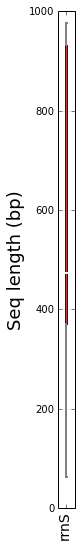

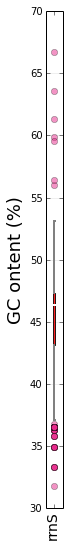

In [30]:
%matplotlib inline
pj.report_seq_stats()

In [31]:
species=[]
for r in pj.records:
    source = [f for f in r.features if f.type == 'source'][0]
    species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 512
Number of species (see below for full list): 24
['Alytes obstetricans', 'Pelophylax ridibundus', 'Discoglossus pictus', 'Lissotriton vulgaris', 'Bombina bombina', 'Lissotriton helveticus', 'Ichthyosaura alpestris', 'Rana dalmatina', 'Epidalea calamita', 'Xenopus laevis', 'Salamandra salamandra', 'Triturus carnifex', 'Rana temporaria', 'Bombina variegata', 'Cottus gobio', 'Hyla arborea', 'Gallus gallus', 'Pelophylax esculentus', 'Triturus cristatus', 'Rana catesbeiana', 'Bufo bufo', 'Pelophylax lessonae', 'Chelydra serpentina', 'Hydromantes genei']


Extract ids of representative sequences identified by vsearch -> remove all others from the object.

In [32]:
ids = []

uc=open('12S_id-1.uc', 'r')

for line in uc:
    if line.startswith('C'):
        ids.append(line.split("\t")[8])
        
recs_to_keep = {'rrnS': ids}
recs_to_drop = {'rrnS': []}

for r in pj.records:
    if not r.id in recs_to_keep['rrnS']:
        recs_to_drop['rrnS'].append(r.id)
        
print "to drop: %s" %len(recs_to_drop['rrnS'])
print "to keep: %s" %len(recs_to_keep['rrnS'])

print "TOTAL: %s" %(len(recs_to_drop['rrnS']) + len(recs_to_keep['rrnS']))

to drop: 307
to keep: 205
TOTAL: 512


Exclude redundant records from object.

In [33]:
pj.exclude(start_from_max=False, **recs_to_drop)

In [34]:
species=[]
for r in pj.records:
    if r.id in recs_to_keep['rrnS']:
        source = [f for f in r.features if f.type == 'source'][0]
        species.append(" ".join(source.qualifiers['organism'][0].split()[0:2]))
    
#print set(species)
total=len(species)
species=list(set(species))

print "Total number of records: %i" %total
print "Number of species (see below for full list): %i" %len(species)
print species

Total number of records: 205
Number of species (see below for full list): 24
['Alytes obstetricans', 'Pelophylax ridibundus', 'Discoglossus pictus', 'Lissotriton vulgaris', 'Pelophylax lessonae', 'Lissotriton helveticus', 'Ichthyosaura alpestris', 'Rana dalmatina', 'Triturus cristatus', 'Xenopus laevis', 'Salamandra salamandra', 'Triturus carnifex', 'Rana temporaria', 'Bombina variegata', 'Cottus gobio', 'Hyla arborea', 'Gallus gallus', 'Pelophylax esculentus', 'Epidalea calamita', 'Rana catesbeiana', 'Bufo bufo', 'Bombina bombina', 'Chelydra serpentina', 'Hydromantes genei']


Write short 12S rRNA sequences (< 500bp) to fasta file to build new alignment outside Reprophylo later in script using hmmbuild. The Hidden Markov Model alignment will include all 12S rRNA sequences - short and long.

In [35]:
temp_seq = []

for r in pj.records_by_locus['rrnS']:
    if len(r.seq) < 500:
        temp_seq.append(r)
        
total = len(temp_seq)
print "Total number of records: %i" %total

from Bio import SeqIO

out=open('amphib_short_to_align.fasta','w')
SeqIO.write(temp_seq, out, 'fasta')
out.close()

Total number of records: 114


# Filter by Length

Write cropped records (minimum length of 500bp) to fasta and Genbank file.

In [36]:
from Bio import SeqIO

temp=[]
for r in pj.records:
    if len(r.seq) >= 500:
        temp.append(r)

out = open('amphib12S_cropped_500bp.gb', 'w')
SeqIO.write(temp, out, 'genbank')
out.close()

out = open('amphib12S_cropped_500bp.fa', 'w')
SeqIO.write(temp, out, 'fasta')
out.close()


del(temp)

Pickle the project.

In [37]:
pickle_pj(pj, 'amphib_nr.pkl')

'amphib_nr.pkl'

Now view records in cropped genbank file.

In [38]:
for index, record in enumerate(SeqIO.parse("amphib12S_cropped_500bp.gb", "genbank")):
        print("index %i, ID = %s, length %i, with %i features"
          % (index, record.id, len(record.seq), len(record.features)))

index 0, ID = AY585337.1, length 937, with 2 features
index 1, ID = KC977221.1, length 663, with 2 features
index 2, ID = EU115993.1, length 933, with 2 features
index 3, ID = U52726.1, length 954, with 2 features
index 4, ID = JX893174.1, length 933, with 2 features
index 5, ID = AY581644.1, length 840, with 2 features
index 6, ID = JX893176.1, length 932, with 2 features
index 7, ID = NC_022696.1, length 937, with 2 features
index 8, ID = JX893175.1, length 933, with 2 features
index 9, ID = KC977215.1, length 663, with 2 features
index 10, ID = AB761267.1, length 937, with 2 features
index 11, ID = AY581648.1, length 840, with 2 features
index 12, ID = X12841.1, length 937, with 2 features
index 13, ID = JX893178.1, length 932, with 2 features
index 14, ID = KC977204.1, length 663, with 2 features
index 15, ID = HQ697272.1, length 924, with 2 features
index 16, ID = M10217.1, length 819, with 2 features
index 17, ID = KC977206.1, length 663, with 2 features
index 18, ID = EU880335.1

Now need to filter all 12S rRNA sequences within pj.records dictionary by length to remove all sequences shorter than 500bp within Reprophylo.

In [39]:
# Define minima and maxima

gc_inliers = {
    'rrnS': [34,55]
}
len_inliers = {
    'rrnS': [500,1000]
}


# Apply to loci data
for locus in gc_inliers:
    # trim GC outliers
    pj.filter_by_gc_content(locus,
                            min_percent_gc=gc_inliers[locus][0],
                            max_percent_gc=gc_inliers[locus][1])

    # trim length outlier
    pj.filter_by_seq_length(locus,
                            min_length=len_inliers[locus][0],
                            max_length=len_inliers[locus][1])

Confirm that the length filter has worked.

Distribution Of Sequence Lengths
Distribution Of Sequence Statistic "Gc_Content"


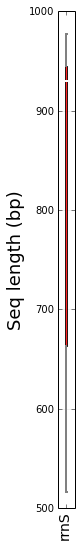

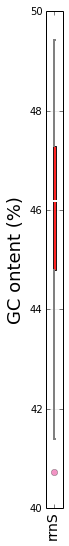

In [40]:
pj.report_seq_stats()

Pickle the project.

In [41]:
pickle_pj(pj, 'amphib_nr.pkl')

'amphib_nr.pkl'

# Alignment

Now, need to produce a sequence alignment file based on an alignment of all 12S sequences longer than 500bp. This will be done with the AlnConf class.

In [42]:
pj = unpickle_pj('amphib_nr.pkl', git=False)

muscle default configuration:

In [43]:
muscle_default = AlnConf(pj,
                          method_name="muscleDefault",
                          program_name="muscle",
                          loci=['rrnS'])

muscle -in 116331477479220.29_rrnS.fasta


Once there are one or more AlnConf objects, they can be executed in one go using the Project method align. This method accepts a list of AlnConf objects and does whatever it is each of them tells it:

In [45]:
pj.align([muscle_default])

When the process is done, the AlnConf objects will be stored in pj.used_methods, which is a dictionary using the method names as keys. If you print one of these AlnConf objects as a string, you will get complete details about the process, including programme versions and references:

In [46]:
print pj.used_methods['muscleDefault']

AlnConf named muscleDefault with ID 116331477479220.29
Loci: rrnS 
Created on: Wed Oct 26 10:53:40 2016
Commands:
rrnS: muscle -in 116331477479220.29_rrnS.fasta

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: MUSCLE v3.8.31\nPal2Nal v14
 Program reference:\nEdgar 2004: MUSCLE: multiple sequence alignment with high accuracy and high throughput. Nucleic Acids Research 32(5):1792-1797\nMikita Suyama
 David Torrents
 and Peer Bork (2006) PAL2NAL: robust conversion of protein sequence alignments into the corresponding codon alignments.Nucleic Acids Res. 34
 W609-W612.
execution time:
14.6074130535


Core Methods section sentence:
The dataset(s) rrnS were first ali

The alignments themselves are stored in the pj.alignments dictionary, using keys that follow this pattern: locus_name@method_name where method_name is the name you have provided to your AlnConf object.

In [47]:
pj.alignments

{'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (89 records of length 1292, IUPACProtein()) at 7f88709dd750>}

Alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID.

In [48]:
# record_id and source_organism are feature qualifiers in the SeqRecord object
files = pj.write_alns(id=['record_id','source_organism'],
                      format='fasta')
files

['rrnS@muscleDefault_aln.fasta']

**NB: muscleDefault alignment was chosen as this is designed for RNA sequences and better equipped to deal with short alignments**

Pickle the project.

In [49]:
pickle_pj(pj, 'amphib_nr.pkl')

'amphib_nr.pkl'

# Build tree

The alignment needs to be trimmed to remove large gaps in sequences. The cell below contains the reprophylo solution for clipping the alignment - the default gappyout algorithm. With TrimalConf, instead of specifying loci names, we provide alignment names, as they appear in the keys of pj.alignments.

In [50]:
muscle_gappyout = TrimalConf(pj,                       # The Project

                            method_name='gappyout',  # Any unique string 
                                                     # ('gappyout' is default)
                            
                            program_name='trimal',   # No alternatives in 
                                                     # this ReproPhylo version
                            
                            cmd='default',           # the default is trimal. 
                                                     # Change it here
                                                     # or in pj.defaults['trimal']
                            
                            alns=['rrnS@muscleDefault'],  # 'all' by default
                            
                            trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                           )

trimal -in 828141477479418.88_rrnS@muscleDefault.fasta -gappyout


In [51]:
pj.trim([muscle_gappyout])

In [52]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 828141477479418.88
Alignments: rrnS@muscleDefault 
Created on: Wed Oct 26 10:56:58 2016
Commands:
rrnS@muscleDefault@gappyout: trimal -in 828141477479418.88_rrnS@muscleDefault.fasta -gappyout

Environment:Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
0.8931620121

Core Methods section sentence:
The alignment(s) rrnS@muscleDefault were trimmed using the program trimAl 1.2rev59 [1].

Reference:
Salvador 

The trimmed alignments themselves are stored in the pj.trimmed_alignments dictionary, using keys.

In [53]:
pj.trimmed_alignments

{'rrnS@muscleDefault@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (89 records of length 1185, IUPACAmbiguousDNA()) at 7f88704eae10>}

Trimmed alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID:

In [54]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault@gappyout_trimmed_aln.fasta']

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML.

Configure RAxML for trimmed muscle alignment.

In [55]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@muscleDefault@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 710041477479523.67_rrnS@muscleDefault@gappyout0 -p 914 -s 710041477479523.67_rrnS@muscleDefault@gappyout.fasta -T 5 -x 770 -N 100


In [56]:
pj.tree([raxml])

In [57]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 710041477479523.67
Alignments: rrnS@muscleDefault@gappyout 
Created on: Wed Oct 26 10:58:43 2016
Commands:
rrnS@muscleDefault@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 710041477479523.67_rrnS@muscleDefault@gappyout0 -p 914 -s 710041477479523.67_rrnS@muscleDefault@gappyout.fasta -T 5 -x 770 -N 100

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
342.651973009

Core Methods section sentence:
Phy

Pickle the project.

In [73]:
pickle_pj(pj, 'amphib_nr.pkl')

'amphib_nr.pkl'

# Visualise Trees

Now let's visualize the trees. 

Prepare tree annotation:
  - define outgroups
  - specify support coloration

In [59]:
pj.add_qualifier_from_source('organism')

In [61]:
for species in ['Chelydra','Cottus','Gallus']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [62]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [64]:
pj.clear_tree_annotations()

pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-trimmed-500bp-raxml.html')

Check trees out. Have a think which sequences you would consider mislabelled and should better be removed from the reference database.

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [65]:
%%bash

last_png=$(ls -hlrt *rrnS@muscleDefault@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-trimmed-500bp-raxml.png

**=======================================================================================================**

# Format long alignment and sequence IDs

In [1]:
from reprophylo import *

In [2]:
pj = unpickle_pj('amphib_nr.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


 - Identify the record ids of the sequences shorter than 500bp
 - write sequences for those to new fasta file (make sure the sequece ids are as Reprophylo expects them: 'id_f0')
 - prepare a hmm profile for the alignment the tree is built on (either muscle 'or mafft)

In [3]:
pj.alignments

{'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (89 records of length 1292, IUPACProtein()) at 7f314f69a310>}

In [4]:
from Bio import AlignIO

out=open('500bp_amphib_align.fasta','w')

AlignIO.write(pj.fta('rrnS@muscleDefault'), out, 'fasta')

returning trimmed alignment object rrnS@muscleDefault@gappyout


1

Check number of records in file containing short 12S rRNA sequences.

In [5]:
from Bio import SeqIO

records = list(SeqIO.parse("amphib_short_to_align.fasta", "fasta"))
print("Total records: %i" % len(records))

Total records: 114


Check that record IDs are in format that reprophylo expects for alignment.

In [6]:
from Bio import SeqIO

short_seq = open("amphib_short_to_align.fasta", "rU")
sequences = []

for r in SeqIO.parse(short_seq, "fasta"):
    print(r.id)

AY322321.1_f0
FJ595208.1_f0
AY347451.1_f0
AF161036.1_f0
AJ440767.1_f0
KP109553.1_f0
KX269198.1_f0
AJ222711.1_f0
AY333688.1_f0
KF645375.1_f0
AY347456.1_f0
AY043038.1_f0
EU116959.1_f0
X95493.1_f0
AY347452.1_f0
AB023395.1_f0
AF218718.1_f0
AY333663.1_f0
AB023396.1_f0
AY222458.1_f0
KF664850.1_f0
AY333653.1_f0
KP109559.1_f0
KF645417.1_f0
AY333665.1_f0
AY147254.1_f0
KF645409.1_f0
AY147256.1_f0
U04702.1_f0
DQ092285.1_f0
KF645408.1_f0
AJ222710.1_f0
AY333669.1_f0
AY880481.1_f0
AY347457.1_f0
AY333687.1_f0
X86235.1_f0
AY347458.1_f0
DQ221219.1_f0
FJ595204.1_f0
KF645371.1_f0
AY333655.1_f0
AB023397.1_f0
AY333683.1_f0
X95494.1_f0
U04704.1_f0
AY880461.1_f0
KP109558.1_f0
AY043041.1_f0
DQ092298.1_f0
KF645367.1_f0
DQ221215.1_f0
KF645365.1_f0
AY347455.1_f0
AY333684.1_f0
AY347454.1_f0
AY043034.1_f0
AJ440762.1_f0
FJ602097.1_f0
DQ092286.1_f0
AY333664.1_f0
AY043032.1_f0
KP109557.1_f0
KF645373.1_f0
KF645370.1_f0
AY333666.1_f0
AB159478.1_f0
KP109555.1_f0
DQ221220.1_f0
DQ221216.1_f0
AY347450.1_f0
AF124103.1_f0
AJ

If record IDs were not in the format Reprophylo expects for tree construction, the code cells below could be used to format them to be 'id_f0'.

In [7]:
#temp_seq = []

#for r in pj.records:
    #if len(r.seq) < 500:
        #temp_seq.append(r)

#from Bio import SeqIO

#out=open('short_to_align.fasta','w')
#SeqIO.write(temp_seq, out, 'fasta')
#out.close()

In [8]:
#from Bio import SeqIO

#short_seq = open("short_to_align.fasta", "rU")
#sequences = []

#for r in SeqIO.parse(short_seq, "fasta"):
    #print(r.id)
    #r.description = r.id+'_f0'
    #r.id = r.description
    #print r.description
    #sequences.append(r)


#out = open("seq_to_align.fasta", "w")
#SeqIO.write(sequences, out, "fasta")
#out.close()

Check that sequences in reprophylo project have not been altered.

In [9]:
for r in pj.records:
    if len(r.seq) < 500:
        print r.id
        print r.description

AY322321.1
Rana lessonae 12S ribosomal RNA gene, partial sequence; tRNA-Val (trnV) gene, complete sequence; and 16S ribosomal RNA gene, partial sequence; mitochondrial genes for mitochondrial products.
FJ602094.1
Hydromantes genei isolate 7 12S ribosomal RNA gene, partial sequence; mitochondrial.
KF664601.1
Bufo bufo voucher vg06282 12S ribosomal RNA gene, partial sequence; mitochondrial.
FJ595208.1
Rana ridibunda 12S ribosomal RNA gene, partial sequence; mitochondrial.
AY347451.1
Discoglossus pictus pictus haplotype ph3 12S ribosomal RNA gene, partial sequence; mitochondrial.
FJ602106.1
Hydromantes genei isolate 4 12S ribosomal RNA gene, partial sequence; mitochondrial.
AF161036.1
Rana temporaria 12S ribosomal RNA gene, partial sequence; mitochondrial gene for mitochondrial product.
AJ440767.1
Discoglossus pictus mitochondrion partial 12S rRNA gene.
AJ222652.1
Rana lessonae mitochondrial 12S rRNA.
KP109553.1
Hyla arborea isolate H523 12S ribosomal RNA gene, partial sequence; mitochond

Pickle the project.

In [10]:
pickle_pj(pj, 'amphib_nr.pkl')

NameError: name 'pj' is not defined

# Feed short 12S rRNA sequences into long alignment

Previously, sequences shorter than 500bp were removed from the pj.records dictionary before a muscle alignment was performed. Short sequences can cause problems in global paired alignments when the alignment algorithm attempts to match them to much longer sequences.

Instead, we performed the long alignment of sequences longer than 500bp first and now we will attempt to incorporate the shorter sequences. This will be done using the hmmbuild command within the hmmer v3 program suite. to construct a Hidden Markov Model and produce a hmm file.

In [2]:
!hmmbuild -h #for help

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Usage: hmmbuild [-options] <hmmfile_out> <msafile>

Basic options:
  -h     : show brief help on version and usage
  -n <s> : name the HMM <s>
  -o <f> : direct summary output to file <f>, not stdout
  -O <f> : resave annotated, possibly modified MSA to file <f>

Options for selecting alphabet rather than guessing it:
  --amino : input alignment is protein sequence data
  --dna   : input alignment is DNA sequence data
  --rna   : input alignment is RNA sequence data

Alternative model construction strategies:
  --fast           : assign cols w/ >= symfrac residues as consensus  [default]
  --hand           : manual construction (requires reference annotation)
  --symfrac <x>    :

In [3]:
!hmmbuild 12S_amphib_ref.hmm 500bp_amphib_align.fasta

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             500bp_amphib_align.fasta
# output HMM file:                  12S_amphib_ref.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen     W eff_nseq re/pos description
#---- -------------------- ----- ----- ----- ----- -------- ------ -----------
1     500bp_amphib_align      89  1185   948  1146     2.59  0.450 

# CPU time: 0.35u 0.00s 00:00:00.35 Elapsed: 00:00:00.35


Now use hmmalign to align the short 12S rRNA sequences to the longer reference alignment.

In [4]:
!hmmalign -h #for help

# hmmalign :: align sequences to a profile HMM
# HMMER 3.1b1 (May 2013); http://hmmer.org/
# Copyright (C) 2013 Howard Hughes Medical Institute.
# Freely distributed under the GNU General Public License (GPLv3).
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Usage: hmmalign [-options] <hmmfile> <seqfile>

Basic options:
  -h     : show brief help on version and usage
  -o <f> : output alignment to file <f>, not stdout

Less common options:
  --mapali <f>    : include alignment in file <f> (same ali that HMM came from)
  --trim          : trim terminal tails of nonaligned residues from alignment
  --amino         : assert <seqfile>, <hmmfile> both protein: no autodetection
  --dna           : assert <seqfile>, <hmmfile> both DNA: no autodetection
  --rna           : assert <seqfile>, <hmmfile> both RNA: no autodetection
  --informat <s>  : assert <seqfile> is in format <s>: no autodetection
  --outformat <s> : output alignment in format <s>  [Stockholm]

Seque

In [5]:
%%bash

hmmalign -o 12S_amphib500bpref_plus_short_query.sto \
--mapali 500bp_amphib_align.fasta \
12S_amphib_ref.hmm amphib_short_to_align.fasta

The hmmalign command has produced a file containing a new alignment of all 12S rRNA sequences (long and short) in stockholm output format. This must be converted to a more useful file format such as fasta or GenBank using the Seq command in BioPython.

In [6]:
from Bio import AlignIO

input_file = open("12S_amphib500bpref_plus_short_query.sto", "rU")
output_file = open("12S_AmphibAlign_ALL.fasta", "w")

alignment = AlignIO.read(input_file, "stockholm")
count = len(alignment)
AlignIO.write(alignment, output_file, "fasta")

output_file.close()
input_file.close()
print("Converted %i records" % count)

Converted 203 records


# Tree Building

The fasta file containing the 12S rRNA amphibian sequence alignment must now be converted into a format which can be used for alignment trimming. The alignment must be parsed to an alignment object, aln.

In [3]:
pj=unpickle_pj('amphib_nr.pkl', git=False)

DEBUG:Cloud:Log file (/root/.picloud/cloud.log) opened


In [4]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

aln = AlignIO.read(open("12S_amphib500bpref_plus_short_query.sto"), "stockholm", alphabet=generic_dna)
for r in aln:
    print(r.id + " is " + str(len(r)) + "bp")

EF122793.1_f0 is 1552bp
JN860636.1_f0 is 1552bp
AB188189.1_f0 is 1552bp
JN627421.1_f0 is 1552bp
JN627422.1_f0 is 1552bp
JN627426.1_f0 is 1552bp
JN627424.1_f0 is 1552bp
JN627425.1_f0 is 1552bp
KC977226.1_f0 is 1552bp
KC977215.1_f0 is 1552bp
AY326063.1_f0 is 1552bp
KC977206.1_f0 is 1552bp
KC977218.1_f0 is 1552bp
KC977222.1_f0 is 1552bp
KC977217.1_f0 is 1552bp
KC977220.1_f0 is 1552bp
KC977225.1_f0 is 1552bp
KC977204.1_f0 is 1552bp
AB685766.1_f0 is 1552bp
KC977224.1_f0 is 1552bp
KF049927.1_f0 is 1552bp
M57527.1_f0 is 1552bp
D12694.1_f0 is 1552bp
KU840522.1_f0 is 1552bp
AB761267.1_f0 is 1552bp
DQ055835.1_f0 is 1552bp
AY843601.1_f0 is 1552bp
AY325988.1_f0 is 1552bp
DQ158438.1_f0 is 1552bp
U52726.1_f0 is 1552bp
EU938400.1_f0 is 1552bp
EU880331.1_f0 is 1552bp
AY928619.1_f0 is 1552bp
EU880335.1_f0 is 1552bp
EU880339.1_f0 is 1552bp
HQ697272.1_f0 is 1552bp
EU880336.1_f0 is 1552bp
KF471517.1_f0 is 1552bp
EF373884.1_f0 is 1552bp
EF373885.1_f0 is 1552bp
EF373883.1_f0 is 1552bp
KP211422.1_f0 is 1552b

In [5]:
pj.alignments['rrnS@amphib_align_allseq'] = aln

In [6]:
pj.alignments

{'rrnS@amphib_align_allseq': <<class 'Bio.Align.MultipleSeqAlignment'> instance (203 records of length 1552, DNAAlphabet()) at 7fb520bc9690>,
 'rrnS@muscleDefault': <<class 'Bio.Align.MultipleSeqAlignment'> instance (89 records of length 1292, IUPACProtein()) at 7fb51fe0a790>}

In [7]:
pj.alignments.keys()

['rrnS@amphib_align_allseq', 'rrnS@muscleDefault']

The alignment needs trimming and removal of gaps within sequences. The below cell contains the reprophylo solution for clipping the alignment - the default gappyout algorithm.

With TrimalConf, instead of specifying loci names, we provide alignment names, as they appear in the keys of pj.alignments.

In [8]:
gappyout = TrimalConf(pj,                      # The Project

                      method_name='gappyout',  # Any unique string 
                                               # ('gappyout' is default)

                      program_name='trimal',   # No alternatives in 
                                               # this ReproPhylo version

                      cmd='default',           # the default is trimal. 
                                               # Change it here
                                               # or in pj.defaults['trimal']

                      alns=['rrnS@amphib_align_allseq'],# 'all' by default

                      trimal_commands={'gappyout': True} # By default, the gappyout algorithm is used.
                      )

trimal -in 475441477481445.48_rrnS@amphib_align_allseq.fasta -gappyout


In [9]:
pj.trim([gappyout])

In [10]:
print pj.used_methods['gappyout']

TrimalConf named gappyout with ID 475441477481445.48
Alignments: rrnS@amphib_align_allseq 
Created on: Wed Oct 26 11:30:45 2016
Commands:
rrnS@amphib_align_allseq@gappyout: trimal -in 475441477481445.48_rrnS@amphib_align_allseq.fasta -gappyout

Environment:Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: trimAl 1.2rev59
 Program reference: Salvador Capella-Gutierrez; Jose M. Silla-Martinez; Toni Gabaldon. trimAl: a tool for automated alignment trimming in large-scale phylogenetic analyses. Bioinformatics 2009 25: 1972-1973.
execution time:
2.18569493294

Core Methods section sentence:
The alignment(s) rrnS@amphib_align_allseq were trimmed using the program trimAl 1.2rev59 [

The trimmed alignments themselves are stored in the pj.trimmed_alignments dictionary, using keys.

In [11]:
pj.trimmed_alignments

{'rrnS@amphib_align_allseq@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (203 records of length 1192, IUPACAmbiguousDNA()) at 7fb51ffa2790>,
 'rrnS@muscleDefault@gappyout': <<class 'Bio.Align.MultipleSeqAlignment'> instance (89 records of length 1185, IUPACAmbiguousDNA()) at 7fb520d43210>}

Trimmed alignment text files can be dumped in any AlignIO format for usage in an external command line or GUI program. When writing to files, you can control the header of the sequence by, for example, adding the organism name of the gene name, or by replacing the feature ID with the record ID:

In [12]:
files = pj.write_trimmed_alns(id=['record_id','source_organism'],
                                   format='fasta')
files

['rrnS@muscleDefault@gappyout_trimmed_aln.fasta',
 'rrnS@amphib_align_allseq@gappyout_trimmed_aln.fasta']

Write clipped alignment to file for downstream taxonomic curation using SATIVA.

In [13]:
from Bio import AlignIO

clipped_aln = pj.trimmed_alignments["rrnS@amphib_align_allseq@gappyout"]

In [14]:
out=open('trimmed_amphib_align_ALL.phy', 'w')
AlignIO.write(clipped_aln, out, 'phylip-relaxed')
out.close()

SATIVA requires a taxonomic file that has been generated from a genbank file containing all record IDs included in the trimmed alignment.

First, the alignment must be parsed in fasta format and record IDs altered to contain only the ID as entered on genbank e.g. EU116957.1

Next, the record IDs must be extracted from the trimmed alignment file.

In [15]:
from Bio import AlignIO
from Bio.Alphabet import generic_dna

input_file = AlignIO.read(open("rrnS@amphib_align_allseq@gappyout_trimmed_aln.fasta"), "fasta")#, alphabet=generic_dna)

to_keep = []

for r in input_file:
    record_id = "_".join(r.id.split("_")[:-1])
    print record_id
    to_keep.append(record_id)


EF122793.1
JN860636.1
AB188189.1
JN627421.1
JN627422.1
JN627426.1
JN627424.1
JN627425.1
KC977226.1
KC977215.1
AY326063.1
KC977206.1
KC977218.1
KC977222.1
KC977217.1
KC977220.1
KC977225.1
KC977204.1
AB685766.1
KC977224.1
KF049927.1
M57527.1
D12694.1
KU840522.1
AB761267.1
DQ055835.1
AY843601.1
AY325988.1
DQ158438.1
U52726.1
EU938400.1
EU880331.1
AY928619.1
EU880335.1
EU880339.1
HQ697272.1
EU880336.1
KF471517.1
EF373884.1
EF373885.1
EF373883.1
KP211422.1
EF373899.1
AP003321.1
FJ610338.1
FJ610339.1
KX512321.1
EF373904.1
KM886936.1
AY235570.1
GU261698.1
GU261674.1
AP003317.1
GU261680.1
GU261678.1
GU261693.1
AB086102.1
GU261683.1
KT626848.1
KP211419.1
GU261707.1
GU261694.1
AP003318.1
KJ858774.1
KJ858773.1
AY585337.1
KJ858770.1
KJ858771.1
KJ858772.1
KJ858776.1
KJ858778.1
M10217.1
Y10943.1
M27605.1
AY581639.1
AY581648.1
AY581644.1
AY581640.1
AY581638.1
JQ626644.1
JQ626643.1
EU115993.1
JX893172.1
AY971143.1
JX893174.1
JX893175.1
JX893178.1
JX893176.1
JX893177.1
AY322321.1
FJ595208.1
AY347451.1


We must create an empty list in which the record IDs in pj.records that match the record IDs from the trimmed alignment can be stored and then written out in a reduced genbank file.

In [16]:
out_gb = []

for r in pj.records:
    if r.id in to_keep:
        out_gb.append(r)

for r in out_gb:
    print r.id
    
out = open("12S_preSATIVA_amphib.gb", "w")
SeqIO.write(out_gb, out, "genbank")
out.close()

AY585337.1
AY322321.1
EU115993.1
FJ595208.1
U52726.1
AY347451.1
JX893174.1
AF161036.1
AY581644.1
JX893176.1
AJ440767.1
KP109553.1
JX893175.1
KX269198.1
KC977215.1
AJ222711.1
AY333688.1
AB761267.1
AY581648.1
KF645375.1
JX893178.1
AY347456.1
AY043038.1
KC977204.1
HQ697272.1
EU116959.1
X95493.1
AY347452.1
M10217.1
AB023395.1
AF218718.1
KC977206.1
AY333663.1
EU880335.1
DQ055835.1
AB023396.1
AY222458.1
KF664850.1
AY333653.1
KP109559.1
JN627424.1
KF645417.1
M27605.1
AY333665.1
AY147254.1
KF645409.1
JX893172.1
AY147256.1
U04702.1
DQ092285.1
KJ858774.1
KF645408.1
AY325988.1
KC977218.1
AJ222710.1
AY333669.1
KJ858776.1
AY880481.1
D12694.1
AY347457.1
KC977217.1
AY333687.1
X86235.1
M57527.1
AY347458.1
DQ221219.1
FJ595204.1
KF645371.1
AY333655.1
AB023397.1
AY333683.1
X95494.1
U04704.1
JN627421.1
KJ858770.1
JQ626644.1
AY880461.1
Y10943.1
EU880339.1
KP109558.1
KJ858773.1
AY043041.1
JN627426.1
KJ858772.1
DQ092298.1
KC977225.1
KC977222.1
AY326063.1
KF645367.1
AY581639.1
KJ858778.1
DQ221215.1
EU880331.1

How to run SATIVA is described in a different notebook. It may be a good strategy to set this going now in a separate notebook. Then contnue onwards in this notebook.

**==============================================================================================================**

Infer Maximum Likelihood tree based on the clipped alignment. We are going to use RAxML.

Configure RAxML.

In [17]:
raxml = RaxmlConf(pj, method_name='raxml-muscleDefault-trimmed',
                  program_name='raxmlHPC-PTHREADS-SSE3',
                  keepfiles=True,
                  cmd='raxmlHPC-PTHREADS-SSE3',
                  preset='fa',
                  alns=['rrnS@amphib_align_allseq@gappyout'],
                  model='GAMMA',
                  threads=5,
                  cline_args={'-#': 100})

raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 403741477481564.12_rrnS@amphib_align_allseq@gappyout0 -p 655 -s 403741477481564.12_rrnS@amphib_align_allseq@gappyout.fasta -T 5 -x 260 -N 100


In [18]:
pj.tree([raxml])

In [19]:
print pj.used_methods['raxml-muscleDefault-trimmed']

RaxmlConf named raxml-muscleDefault-trimmed with ID 403741477481564.12
Alignments: rrnS@amphib_align_allseq@gappyout 
Created on: Wed Oct 26 11:32:44 2016
Commands:
rrnS@amphib_align_allseq@gappyout:
raxmlHPC-PTHREADS-SSE3 -f a -m GTRGAMMA -n 403741477481564.12_rrnS@amphib_align_allseq@gappyout0 -p 655 -s 403741477481564.12_rrnS@amphib_align_allseq@gappyout.fasta -T 5 -x 260 -N 100

Environment:
Platform: Linux-4.4.0-38-generic-x86_64-with-Ubuntu-14.04-trusty
 Processor: x86_64
 Python build: defaultMar 22 2014 22:59:56
 Python compiler: GCC 4.8.2
 Python implementation: CPython
 Python version: 2.7.6
 ete2 version: 2.2.1072
 biopython version: 1.68
 dendropy version: 3.12.2
 cloud version: 2.8.5
 reprophylo version 1.3
 User: biopc4
 Program and version: raxmlHPC-PTHREADS-SSE3RAxML version 8.0.12
 Program reference: A. Stamatakis: RAxML Version 8: A tool for Phylogenetic Analysis and Post-Analysis of Large Phylogenies. In Bioinformatics
 2014.
execution time:
2243.74979591

Core Metho

In [20]:
pj.trees.keys()

['rrnS@muscleDefault@gappyout@raxml-muscleDefault-trimmed',
 'rrnS@amphib_align_allseq@gappyout@raxml-muscleDefault-trimmed']

Pickle the project.

In [21]:
pickle_pj(pj, 'amphib_nr.pkl')

'amphib_nr.pkl'

# Visualise tree

Now let's visualize the tree. 

Prepare tree annotation:

  - define outgroups
  - specify support coloration

In [22]:
pj.add_qualifier_from_source('organism')

In [23]:
for species in ['Chelydra','Cottus','Gallus']:
    pj.if_this_then_that(species, 'organism', 'outgroup', 'outgroup',
                         mode='part')

In [24]:
supports = {'black': [100,95],
            'dimgray': [95,75],
            'silver': [75,50]}

In [25]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='muscleDefault-trimmed-amphib-all-raxml.html')

Check tree out. Have a think which sequences you would consider mislabelled and should better be removed from the reference database.

Create a static copy of the tree (the last *.png with the expected alignment id) for later.

In [26]:
%%bash

last_png=$(ls -hlrt *rrnS@amphib_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png rrnS_muscleDefault-trimmed-amphib-all-raxml.png

**===========================================================================================**

In the meantime we have run SATIVA on the alignment that was the basis of the above tree.

Now we are going to highlight the records that SATIVA considers mislabelled in the tree. We are also going to add a heatmap to the tree illustrating the confidence that SATIVA has in a given call.

Parse SATIVA output and record putatively mislabelled sequence records and the confidence of the call.

In [27]:
rec_mislabelled = {}
sativa=open('../SATIVA/12S.mis', 'r')

for line in sativa:
    if not line.startswith(";"):
        rec_mislabelled[line.split("\t")[0]] = line.split("\t")[4]

Add two new qualifiers containing info about he SATIVA results to the sequence features.

In [28]:
for r in pj.records:
    if r.id in rec_mislabelled:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['yes']
            f.qualifiers['mislabeled_conf'] = [rec_mislabelled[r.id]]
    else:
        for f in r.features:
            f.qualifiers['mislabeled'] = ['no']
            f.qualifiers['mislabeled_conf'] = [0.0001]

In [29]:
pj.propagate_metadata()

Prepare tree annotation:

- color records that were identified by SATIVA as being mislabelled.
- add heatmap with mislabel confidence

In [30]:
leaf_colors = {'yes':'red', 'no': 'black'}
bg_colors = {'yes':'red', 'no': 'white'}

In [31]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='rrnS_muscleDefault-trimmed-amphib-all-raxml-SATIVA.html',
            fsize=13,
            heat_map_meta = ['mislabeled_conf'], heat_map_colour_scheme = 1,
            leaf_node_color_meta = 'mislabeled', leaf_label_colors = leaf_colors)

In [32]:
%%bash

last_png=$(ls -hlrt *rrnS@amphib_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png 12S_muscleDefault_trimmed_amphib_all_raxml_SATIVA_leaf_colored.png

In [33]:
pj.clear_tree_annotations()
pj.annotate('.', 'outgroup', 'outgroup', 
            ['source_organism', 'record_id'], 
            node_support_dict=supports, multifurc=10,
            html='rrnS_muscleDefault-trimmed-amphib-all-raxml-SATIVA.html',
            fsize=13,
            heat_map_meta = ['mislabeled_conf'], heat_map_colour_scheme = 1,
            node_bg_meta = 'mislabeled', node_bg_color = bg_colors)

In [34]:
%%bash

target=12S_muscleDefault_trimmed_amphib_all_SATIVA_bg_colored.png

last_png=$(ls -hlrt *rrnS@amphib_align_allseq@gappyout.png | tail -n 1 | perl -ne 'chomp; @a=split(" "); print "$a[-1]"')
cp $last_png $target

In [35]:
pickle_pj(pj, 'amphib_nr.pkl')

'amphib_nr.pkl'